In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import re
import nltk
nltk.download('stopwords')
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2 
import random
from joblib import dump
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\itdel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# read data
def load_data():
    data = pd.read_excel('C:/Users/itdel/Documents/Tambun/DBSCAN/Anies/datasetanies.xlsx')
    return data

In [3]:
data = load_data()
df = data
df

,USER,comment
0,ramadhandesember4361,Mau melakukan perubahan?? Kekuatan logistik bg...
1,rhb_setyadi,Hahahahaha...mau jadi Cawapres nggak mau kelua...
2,intanghandy,4 T minimal buat nyapres. PKS kan dananya dr i...
3,renggardo,CUKUP DI UKRAINA PELAWAK BISA JADI PRESIDEN !!!
4,toniantons,Gua demanni ud mulai saling dan saling😂😂😂
...,...,...
208126,andrisyah76171,Tapi gua sangat meragukan..😂😂😂
208127,riswandi_asep0401,@islah_bahrawi .... @mustofanahra_id
208128,ade_rongsocker,Akh ....klo sesamanya deh gitu.....😂
208129,yulie_wahid,Ini baru benaaaar


### Data Cleaning

In [4]:
# Drop attribut
df = df.drop('USER', axis=1)
df.head()

,comment
0,Mau melakukan perubahan?? Kekuatan logistik bg...
1,Hahahahaha...mau jadi Cawapres nggak mau kelua...
2,4 T minimal buat nyapres. PKS kan dananya dr i...
3,CUKUP DI UKRAINA PELAWAK BISA JADI PRESIDEN !!!
4,Gua demanni ud mulai saling dan saling😂😂😂


In [5]:
import re
import numpy as np

def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)
    return text

# Converting the 'comment' column to a string data type.
df['comment'] = df['comment'].astype(str)

# Applying the remove_pattern function on the 'comment' column and saving the result to the 'clean_comment' column
df['comment_cl1'] = np.vectorize(remove_pattern)(df['comment'], " *RT* | *@[\w]*")

# Returns the top few rows of the DataFrame
df.head()

,comment,comment_cl1
0,Mau melakukan perubahan?? Kekuatan logistik bg...,Mau melakukan perubahan?? Kekuatan logistik bg...
1,Hahahahaha...mau jadi Cawapres nggak mau kelua...,Hahahahaha...mau jadi Cawapres nggak mau kelua...
2,4 T minimal buat nyapres. PKS kan dananya dr i...,4 T minimal buat nyapres. PKS kan dananya dr i...
3,CUKUP DI UKRAINA PELAWAK BISA JADI PRESIDEN !!!,CUKUP DI UKRAINA PELAWAK BISA JADI PRESIDEN !!!
4,Gua demanni ud mulai saling dan saling😂😂😂,Gua demanni ud mulai saling dan saling😂😂😂


In [6]:
# remove simbol/character
def remove(text):
    text = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",text).split())
    return text
df['comment_cl2'] = df['comment_cl1'].apply(lambda x: remove(x))
df.head()

,comment,comment_cl1,comment_cl2
0,Mau melakukan perubahan?? Kekuatan logistik bg...,Mau melakukan perubahan?? Kekuatan logistik bg...,Mau melakukan perubahan Kekuatan logistik bgmn
1,Hahahahaha...mau jadi Cawapres nggak mau kelua...,Hahahahaha...mau jadi Cawapres nggak mau kelua...,Hahahahaha mau jadi Cawapres nggak mau keluar ...
2,4 T minimal buat nyapres. PKS kan dananya dr i...,4 T minimal buat nyapres. PKS kan dananya dr i...,4 T minimal buat nyapres PKS kan dananya dr iu...
3,CUKUP DI UKRAINA PELAWAK BISA JADI PRESIDEN !!!,CUKUP DI UKRAINA PELAWAK BISA JADI PRESIDEN !!!,CUKUP DI UKRAINA PELAWAK BISA JADI PRESIDEN
4,Gua demanni ud mulai saling dan saling😂😂😂,Gua demanni ud mulai saling dan saling😂😂😂,Gua demanni ud mulai saling dan saling


In [7]:
# remove
def remove(tweet):
    #remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', tweet)

    #remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)

    #remove hastags, only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)

    #remove angka
    tweet = re.sub('[0-9]+', '', tweet)

    return tweet
df['comment_cl3'] = df['comment_cl2'].apply(lambda x: remove(x))
df.head()

,comment,comment_cl1,comment_cl2,comment_cl3
0,Mau melakukan perubahan?? Kekuatan logistik bg...,Mau melakukan perubahan?? Kekuatan logistik bg...,Mau melakukan perubahan Kekuatan logistik bgmn,Mau melakukan perubahan Kekuatan logistik bgmn
1,Hahahahaha...mau jadi Cawapres nggak mau kelua...,Hahahahaha...mau jadi Cawapres nggak mau kelua...,Hahahahaha mau jadi Cawapres nggak mau keluar ...,Hahahahaha mau jadi Cawapres nggak mau keluar ...
2,4 T minimal buat nyapres. PKS kan dananya dr i...,4 T minimal buat nyapres. PKS kan dananya dr i...,4 T minimal buat nyapres PKS kan dananya dr iu...,T minimal buat nyapres PKS kan dananya dr iur...
3,CUKUP DI UKRAINA PELAWAK BISA JADI PRESIDEN !!!,CUKUP DI UKRAINA PELAWAK BISA JADI PRESIDEN !!!,CUKUP DI UKRAINA PELAWAK BISA JADI PRESIDEN,CUKUP DI UKRAINA PELAWAK BISA JADI PRESIDEN
4,Gua demanni ud mulai saling dan saling😂😂😂,Gua demanni ud mulai saling dan saling😂😂😂,Gua demanni ud mulai saling dan saling,Gua demanni ud mulai saling dan saling


### Teks Preprocessing

##### Lowercasing

In [8]:
# lowercasing
df.drop(["comment_cl1"], axis=1, inplace=True) 

df['Text_lower'] = df['comment_cl3'].str.lower()
df

,comment,comment_cl2,comment_cl3,Text_lower
0,Mau melakukan perubahan?? Kekuatan logistik bg...,Mau melakukan perubahan Kekuatan logistik bgmn,Mau melakukan perubahan Kekuatan logistik bgmn,mau melakukan perubahan kekuatan logistik bgmn
1,Hahahahaha...mau jadi Cawapres nggak mau kelua...,Hahahahaha mau jadi Cawapres nggak mau keluar ...,Hahahahaha mau jadi Cawapres nggak mau keluar ...,hahahahaha mau jadi cawapres nggak mau keluar ...
2,4 T minimal buat nyapres. PKS kan dananya dr i...,4 T minimal buat nyapres PKS kan dananya dr iu...,T minimal buat nyapres PKS kan dananya dr iur...,t minimal buat nyapres pks kan dananya dr iur...
3,CUKUP DI UKRAINA PELAWAK BISA JADI PRESIDEN !!!,CUKUP DI UKRAINA PELAWAK BISA JADI PRESIDEN,CUKUP DI UKRAINA PELAWAK BISA JADI PRESIDEN,cukup di ukraina pelawak bisa jadi presiden
4,Gua demanni ud mulai saling dan saling😂😂😂,Gua demanni ud mulai saling dan saling,Gua demanni ud mulai saling dan saling,gua demanni ud mulai saling dan saling
...,...,...,...,...
208126,Tapi gua sangat meragukan..😂😂😂,Tapi gua sangat meragukan,Tapi gua sangat meragukan,tapi gua sangat meragukan
208127,@islah_bahrawi .... @mustofanahra_id,,,
208128,Akh ....klo sesamanya deh gitu.....😂,Akh klo sesamanya deh gitu,Akh klo sesamanya deh gitu,akh klo sesamanya deh gitu
208129,Ini baru benaaaar,Ini baru benaaaar,Ini baru benaaaar,ini baru benaaaar


##### Stopword Removal

In [9]:
# Added a stopword dictionary that doesn't exist in literary python yet
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary

stop_factory = StopWordRemoverFactory().get_stop_words()
more_stopwords = [
    'yg', 'utk', 'cuman', 'deh', 'Btw', 'tapi', 'gua', 'gue', 'lo', 'lu',
    'kalo', 'trs', 'jd', 'nih', 'ntar', 'nya', 'lg', 'gk', 'ecusli', 'dpt',
    'dr', 'kpn', 'kok', 'kyk', 'donk', 'yah', 'u', 'ya', 'ga', 'km', 'eh',
    'sih', 'eh', 'bang', 'br', 'kyk', 'rp', 'jt', 'kan', 'gpp', 'sm', 'usah',
    'mas', 'sob', 'thx', 'ato', 'jg', 'gw', 'wkwk', 'mak', 'haha', 'iy', 'k',
    'tp', 'haha', 'dg', 'dri', 'duh', 'ye', 'wkwkwk', 'syg', 'btw',
    'nerjemahan', 'gaes', 'guys', 'moga', 'kmrn', 'nemu', 'yukkk',
    'wkwkw', 'klas', 'iu', 'ew', 'lho', 'sbnry', 'org', 'gtu', 'bwt',
    'klrga', 'clau', 'lbh', 'cpet', 'ku', 'uke', 'mba', 'mas', 'sdh', 'kmrn',
    'oi', 'spt', 'dlm', 'bs', 'krn', 'jgn', 'sapa', 'spt', 'sh', 'wakakaka',
    'sihhh', 'hehe', 'ih', 'dgn', 'la', 'kl', 'ttg', 'mana', 'kmna', 'kmn',
    'tdk', 'tuh', 'dah', 'kek', 'ko', 'pls', 'bbrp', 'pd', 'mah', 'dhhh',
    'kpd', 'tuh', 'kzl', 'byar', 'si', 'sii', 'cm', 'sy', 'hahahaha', 'weh',
    'dlu', 'tuhh'
]

data = stop_factory + more_stopwords
dictionary = ArrayDictionary(data)
stp = StopWordRemover(dictionary)

df["Text_wo_stop"] = df["Text_lower"].apply(lambda text: stp.remove(text))
df

,comment,comment_cl2,comment_cl3,Text_lower,Text_wo_stop
0,Mau melakukan perubahan?? Kekuatan logistik bg...,Mau melakukan perubahan Kekuatan logistik bgmn,Mau melakukan perubahan Kekuatan logistik bgmn,mau melakukan perubahan kekuatan logistik bgmn,mau melakukan perubahan kekuatan logistik bgmn
1,Hahahahaha...mau jadi Cawapres nggak mau kelua...,Hahahahaha mau jadi Cawapres nggak mau keluar ...,Hahahahaha mau jadi Cawapres nggak mau keluar ...,hahahahaha mau jadi cawapres nggak mau keluar ...,hahahahaha mau jadi cawapres mau keluar duit m...
2,4 T minimal buat nyapres. PKS kan dananya dr i...,4 T minimal buat nyapres PKS kan dananya dr iu...,T minimal buat nyapres PKS kan dananya dr iur...,t minimal buat nyapres pks kan dananya dr iur...,t minimal buat nyapres pks dananya iuran buka...
3,CUKUP DI UKRAINA PELAWAK BISA JADI PRESIDEN !!!,CUKUP DI UKRAINA PELAWAK BISA JADI PRESIDEN,CUKUP DI UKRAINA PELAWAK BISA JADI PRESIDEN,cukup di ukraina pelawak bisa jadi presiden,cukup ukraina pelawak jadi presiden
4,Gua demanni ud mulai saling dan saling😂😂😂,Gua demanni ud mulai saling dan saling,Gua demanni ud mulai saling dan saling,gua demanni ud mulai saling dan saling,demanni ud mulai saling saling
...,...,...,...,...,...
208126,Tapi gua sangat meragukan..😂😂😂,Tapi gua sangat meragukan,Tapi gua sangat meragukan,tapi gua sangat meragukan,gua sangat meragukan
208127,@islah_bahrawi .... @mustofanahra_id,,,,
208128,Akh ....klo sesamanya deh gitu.....😂,Akh klo sesamanya deh gitu,Akh klo sesamanya deh gitu,akh klo sesamanya deh gitu,akh klo sesamanya gitu
208129,Ini baru benaaaar,Ini baru benaaaar,Ini baru benaaaar,ini baru benaaaar,baru benaaaar


##### Tokenization

In [10]:
import string
from nltk.tokenize import TweetTokenizer

# Tokenization
def tokenize_tweets(tweet):
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)
    return tweet_tokens

# Apply tokenisasi
df['tokenisasi'] = df['Text_wo_stop'].apply(lambda x: tokenize_tweets(x))
df.head(5)

,comment,comment_cl2,comment_cl3,Text_lower,Text_wo_stop,tokenisasi
0,Mau melakukan perubahan?? Kekuatan logistik bg...,Mau melakukan perubahan Kekuatan logistik bgmn,Mau melakukan perubahan Kekuatan logistik bgmn,mau melakukan perubahan kekuatan logistik bgmn,mau melakukan perubahan kekuatan logistik bgmn,"[mau, melakukan, perubahan, kekuatan, logistik..."
1,Hahahahaha...mau jadi Cawapres nggak mau kelua...,Hahahahaha mau jadi Cawapres nggak mau keluar ...,Hahahahaha mau jadi Cawapres nggak mau keluar ...,hahahahaha mau jadi cawapres nggak mau keluar ...,hahahahaha mau jadi cawapres mau keluar duit m...,"[hahahahaha, mau, jadi, cawapres, mau, keluar,..."
2,4 T minimal buat nyapres. PKS kan dananya dr i...,4 T minimal buat nyapres PKS kan dananya dr iu...,T minimal buat nyapres PKS kan dananya dr iur...,t minimal buat nyapres pks kan dananya dr iur...,t minimal buat nyapres pks dananya iuran buka...,"[t, minimal, buat, nyapres, pks, dananya, iura..."
3,CUKUP DI UKRAINA PELAWAK BISA JADI PRESIDEN !!!,CUKUP DI UKRAINA PELAWAK BISA JADI PRESIDEN,CUKUP DI UKRAINA PELAWAK BISA JADI PRESIDEN,cukup di ukraina pelawak bisa jadi presiden,cukup ukraina pelawak jadi presiden,"[cukup, ukraina, pelawak, jadi, presiden]"
4,Gua demanni ud mulai saling dan saling😂😂😂,Gua demanni ud mulai saling dan saling,Gua demanni ud mulai saling dan saling,gua demanni ud mulai saling dan saling,demanni ud mulai saling saling,"[demanni, ud, mulai, saling, saling]"


##### Stemming

In [11]:
import string
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

# happy emoticon
emoticons_happy = set([
    ':-)', ':)', ';)', ':o)', ':]', ':3', ':c)', ':>', '=]', '8)', '=)', ':}',
    ':^)', ':-D', ':D', '8-D', '8D', 'x-D', 'xD', 'X-D', 'XD', '=-D', '=D',
    '=-3', '=3', ':-))', ":'-)", ":')", ':*', ':^*', '>:P', ':-P', ':P', 'X-P',
    'X-p', 'Xp', 'XP', ':-p', ':p', '=p', ':-b', ':b', '>:)', '>;)', '>:-)',
    '<3'
])
# sad emoticon
emoticons_sad = set([
    ':L', ':-/', '>:/', ':S', '>:[', ':@', ':-(', ':[', ':-||', '=L', ':<',
    ':-[', ':-<', '=\\', '=/', '>:(', ':(', '>.<', ":'-(", ":'(", ':\\', ':-c',
    ':c', ':{', '>:\\', ';('
])
# all emoticons (happy + sad)
emoticons = emoticons_happy.union(emoticons_sad)


# Stemming
def stem_tweets(tweet_tokens):
    tweets_clean = []
    for word in tweet_tokens:
        if (word not in data and # remove stopwords
              word not in emoticons and # remove emoticons
              word not in string.punctuation): # remove punctuation
            stem_word = stemmer.stem(word) # stemming word
            tweets_clean.append(stem_word)
    return tweets_clean

# Apply stemming
df.drop(["comment_cl2"], axis=1, inplace=True)
df['stemming'] = df['tokenisasi'].apply(lambda x: stem_tweets(x))

# Show the resulting DataFrame
df.head()

,comment,comment_cl3,Text_lower,Text_wo_stop,tokenisasi,stemming
0,Mau melakukan perubahan?? Kekuatan logistik bg...,Mau melakukan perubahan Kekuatan logistik bgmn,mau melakukan perubahan kekuatan logistik bgmn,mau melakukan perubahan kekuatan logistik bgmn,"[mau, melakukan, perubahan, kekuatan, logistik...","[mau, laku, ubah, kuat, logistik, bgmn]"
1,Hahahahaha...mau jadi Cawapres nggak mau kelua...,Hahahahaha mau jadi Cawapres nggak mau keluar ...,hahahahaha mau jadi cawapres nggak mau keluar ...,hahahahaha mau jadi cawapres mau keluar duit m...,"[hahahahaha, mau, jadi, cawapres, mau, keluar,...","[hahahahaha, mau, jadi, cawapres, mau, keluar,..."
2,4 T minimal buat nyapres. PKS kan dananya dr i...,T minimal buat nyapres PKS kan dananya dr iur...,t minimal buat nyapres pks kan dananya dr iur...,t minimal buat nyapres pks dananya iuran buka...,"[t, minimal, buat, nyapres, pks, dananya, iura...","[t, minimal, buat, nyapres, pks, dana, iur, bu..."
3,CUKUP DI UKRAINA PELAWAK BISA JADI PRESIDEN !!!,CUKUP DI UKRAINA PELAWAK BISA JADI PRESIDEN,cukup di ukraina pelawak bisa jadi presiden,cukup ukraina pelawak jadi presiden,"[cukup, ukraina, pelawak, jadi, presiden]","[cukup, ukraina, lawak, jadi, presiden]"
4,Gua demanni ud mulai saling dan saling😂😂😂,Gua demanni ud mulai saling dan saling,gua demanni ud mulai saling dan saling,demanni ud mulai saling saling,"[demanni, ud, mulai, saling, saling]","[demanni, ud, mulai, saling, saling]"


##### Remove Punctuation

In [12]:
# remove punct
def remove_punct(text):
    text = " ".join([char for char in text if char not in string.punctuation])
    return text
df['comments'] = df['stemming'].apply(lambda x: remove_punct(x))
df.head()

,comment,comment_cl3,Text_lower,Text_wo_stop,tokenisasi,stemming,comments
0,Mau melakukan perubahan?? Kekuatan logistik bg...,Mau melakukan perubahan Kekuatan logistik bgmn,mau melakukan perubahan kekuatan logistik bgmn,mau melakukan perubahan kekuatan logistik bgmn,"[mau, melakukan, perubahan, kekuatan, logistik...","[mau, laku, ubah, kuat, logistik, bgmn]",mau laku ubah kuat logistik bgmn
1,Hahahahaha...mau jadi Cawapres nggak mau kelua...,Hahahahaha mau jadi Cawapres nggak mau keluar ...,hahahahaha mau jadi cawapres nggak mau keluar ...,hahahahaha mau jadi cawapres mau keluar duit m...,"[hahahahaha, mau, jadi, cawapres, mau, keluar,...","[hahahahaha, mau, jadi, cawapres, mau, keluar,...",hahahahaha mau jadi cawapres mau keluar duit m...
2,4 T minimal buat nyapres. PKS kan dananya dr i...,T minimal buat nyapres PKS kan dananya dr iur...,t minimal buat nyapres pks kan dananya dr iur...,t minimal buat nyapres pks dananya iuran buka...,"[t, minimal, buat, nyapres, pks, dananya, iura...","[t, minimal, buat, nyapres, pks, dana, iur, bu...",t minimal buat nyapres pks dana iur bukan nega...
3,CUKUP DI UKRAINA PELAWAK BISA JADI PRESIDEN !!!,CUKUP DI UKRAINA PELAWAK BISA JADI PRESIDEN,cukup di ukraina pelawak bisa jadi presiden,cukup ukraina pelawak jadi presiden,"[cukup, ukraina, pelawak, jadi, presiden]","[cukup, ukraina, lawak, jadi, presiden]",cukup ukraina lawak jadi presiden
4,Gua demanni ud mulai saling dan saling😂😂😂,Gua demanni ud mulai saling dan saling,gua demanni ud mulai saling dan saling,demanni ud mulai saling saling,"[demanni, ud, mulai, saling, saling]","[demanni, ud, mulai, saling, saling]",demanni ud mulai saling saling


In [13]:
# remove kolom
df.drop(df.columns[[1,2,3,4,5]], axis = 1, inplace = True)
df.head()

,comment,comments
0,Mau melakukan perubahan?? Kekuatan logistik bg...,mau laku ubah kuat logistik bgmn
1,Hahahahaha...mau jadi Cawapres nggak mau kelua...,hahahahaha mau jadi cawapres mau keluar duit m...
2,4 T minimal buat nyapres. PKS kan dananya dr i...,t minimal buat nyapres pks dana iur bukan nega...
3,CUKUP DI UKRAINA PELAWAK BISA JADI PRESIDEN !!!,cukup ukraina lawak jadi presiden
4,Gua demanni ud mulai saling dan saling😂😂😂,demanni ud mulai saling saling


In [14]:
# remove empty comments
df = df[df['comments']!='']

# reset index
df = df.reset_index(drop=True)
df.head()

,comment,comments
0,Mau melakukan perubahan?? Kekuatan logistik bg...,mau laku ubah kuat logistik bgmn
1,Hahahahaha...mau jadi Cawapres nggak mau kelua...,hahahahaha mau jadi cawapres mau keluar duit m...
2,4 T minimal buat nyapres. PKS kan dananya dr i...,t minimal buat nyapres pks dana iur bukan nega...
3,CUKUP DI UKRAINA PELAWAK BISA JADI PRESIDEN !!!,cukup ukraina lawak jadi presiden
4,Gua demanni ud mulai saling dan saling😂😂😂,demanni ud mulai saling saling


In [15]:
# save clean data to file
df.to_csv('C:/Users/itdel/Documents/Tambun/DBSCAN/Anies/DataBersihAnies.csv', encoding='utf8', index=False)

### Clustering DBSCAN

In [37]:
from sklearn.cluster import DBSCAN
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import silhouette_score

In [38]:
def load_lexicon_lexis(file_path):
    words = []
    scores = []
    with open(file_path, 'r') as file:
        for line in file:
            data = line.strip().split(' ')
            if len(data) >= 2:
                word = data[0].strip()
                score = int(data[1].strip())
                words.append(word)
                scores.append(score)
    return dict(zip(words, scores))

In [39]:
# load kamus sentimen
lexicon = load_lexicon_lexis('C:/Users/itdel/Documents/Tambun/DBSCAN/Anies/kamus.txt')

In [40]:
df = pd.read_csv('C:/Users/itdel/Documents/Tambun/DBSCAN/Anies/DataBersihAnies.csv') 
df.head()

,comment,comments
0,Mau melakukan perubahan?? Kekuatan logistik bg...,mau laku ubah kuat logistik bgmn
1,Hahahahaha...mau jadi Cawapres nggak mau kelua...,hahahahaha mau jadi cawapres mau keluar duit m...
2,4 T minimal buat nyapres. PKS kan dananya dr i...,t minimal buat nyapres pks dana iur bukan nega...
3,CUKUP DI UKRAINA PELAWAK BISA JADI PRESIDEN !!!,cukup ukraina lawak jadi presiden
4,Gua demanni ud mulai saling dan saling😂😂😂,demanni ud mulai saling saling


In [41]:
# add column to save sentiment score
df['sentiment_score'] = 0

In [42]:
for i, row in df.iterrows():
    comments = row['comments']
    if not pd.isna(comments):  # Checks if value is not NaN
        words = str(comments).split()  # Convert to string before calling split()
        score = sum([lexicon.get(word, 0) for word in words])
        df.at[i, 'sentiment_score'] = score
    else:
        df.at[i, 'sentiment_score'] = 0  # Sets sentiment score to 0 for NaN values

In [43]:
df

,comment,comments,sentiment_score
0,Mau melakukan perubahan?? Kekuatan logistik bg...,mau laku ubah kuat logistik bgmn,10
1,Hahahahaha...mau jadi Cawapres nggak mau kelua...,hahahahaha mau jadi cawapres mau keluar duit m...,16
2,4 T minimal buat nyapres. PKS kan dananya dr i...,t minimal buat nyapres pks dana iur bukan nega...,0
3,CUKUP DI UKRAINA PELAWAK BISA JADI PRESIDEN !!!,cukup ukraina lawak jadi presiden,8
4,Gua demanni ud mulai saling dan saling😂😂😂,demanni ud mulai saling saling,0
...,...,...,...
191280,Allahuakbar 👏🔥👏,allahuakbar,0
191281,Tapi gua sangat meragukan..😂😂😂,sangat ragu,-2
191282,Akh ....klo sesamanya deh gitu.....😂,akh klo sama gitu,3
191283,Ini baru benaaaar,baru benaaar,0


In [45]:
df = df.dropna(subset=['comments'])

In [46]:
# transformasi tf-idf
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, min_df=2, ngram_range=(1,2))
X = tfidf_vectorizer.fit_transform(df['comments'])

In [47]:
display(X)

<189226x244153 sparse matrix of type '<class 'numpy.float64'>'
	with 2969018 stored elements in Compressed Sparse Row format>

#### Clustering

In [56]:
# define DBSCAN parameters
dbscan = DBSCAN(eps=0.5, min_samples=9, metric='euclidean')

In [58]:
# get group label for each data
labels = dbscan.fit_predict(X)

In [59]:
# Get the number of groups formed
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print("Jumlah kelompok: ", n_clusters)

Jumlah kelompok:  3


In [60]:
# change the clustering result data into DataFrame format
df_clustered = pd.DataFrame({'comments': df['comments'], 'cluster': labels})

##### Evaluation With Silhouette Coefficient


In [61]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs

In [62]:
# generate sample data
X, y = make_blobs(n_samples=189226, centers=3, random_state=42)

In [63]:
# calculate the silhouette score
score = silhouette_score(X, labels)
print("Silhouette score:", score)

Silhouette score: 0.8280283610661706


In [64]:
#displaying clustering results
df['cluster'] = labels

# Display the number of data points in each cluster
print(df.groupby(['cluster']).count())

C:\Users\itdel\AppData\Local\Temp\ipykernel_5908\3644549068.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = labels


         comment  comments  sentiment_score
cluster                                    
-1            37        37               37
 0         63058     63058            63058
 1         63069     63069            63069
 2         63062     63062            63062


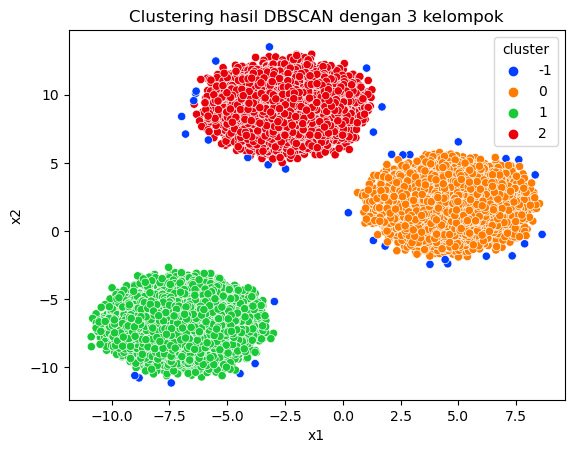

In [65]:
import seaborn as sns

# create a DataFrame for data and group labels
df_cluster = pd.DataFrame(X, columns=['x1', 'x2'])
df_cluster['cluster'] = labels

# plotting using seaborn
sns.scatterplot(x='x1', y='x2', data=df_cluster, hue='cluster', palette='bright')
plt.title(f"Clustering hasil DBSCAN dengan {n_clusters} kelompok")
plt.show()

##### Extract Top 10 Words Based on Base Centroid

In [66]:
import numpy as np

# Calculates the average distance from each point in the cluster to the reference point in the cluster
def cluster_center_distance(X, labels, cluster_id):
    cluster_points = X[labels == cluster_id]
    center = np.mean(cluster_points, axis=0)
    distances = np.linalg.norm(cluster_points - center, axis=1)
    return distances

# Calculates the distance between each document and the cluster center in the DBSCAN context
distances = np.zeros((X.shape[0],)) # Initialize the distance matrix
for cluster_id in range(n_clusters):
    cluster_distances = cluster_center_distance(X, labels, cluster_id)
    distances[labels == cluster_id] = cluster_distances

# For each cluster formed, take the top 10 words and identify their sentiment values
for cluster_id in range(n_clusters):
    cluster_words = []
    for doc_id, label in enumerate(labels):
        if label == cluster_id:
            words = df.iloc[doc_id]['comments'].split()
            cluster_words.extend(words)
    top_words = pd.Series(cluster_words).value_counts().head(10)
    top_words_scores = [lexicon.get(word, 0) for word in top_words.index]
    print(f"Cluster {cluster_id} Top 10 words: {', '.join(top_words.index)}")
    print(f"Sentiment Scores: {', '.join(map(str, top_words_scores))}")


Cluster 0 Top 10 words: pak, anies, presiden, jadi, allah, anis, indonesia, moga, aamiin, rakyat
Sentiment Scores: 0, 0, 1, 4, 5, 0, 0, 3, 0, 1
Cluster 1 Top 10 words: pak, anies, presiden, jadi, allah, anis, indonesia, moga, aamiin, rakyat
Sentiment Scores: 0, 0, 1, 4, 5, 0, 0, 3, 0, 1
Cluster 2 Top 10 words: pak, anies, presiden, jadi, allah, anis, indonesia, moga, aamiin, rakyat
Sentiment Scores: 0, 0, 1, 4, 5, 0, 0, 3, 0, 1


##### Calculating the Polarity of Each Cluster

In [67]:
# calculate the average polarity of each cluster
cluster_sentiment = []
for i in range(n_clusters):
    cluster = df[df['cluster'] == i]
    sentiment_sum = cluster['sentiment_score'].sum()
    num_docs = len(cluster)
    avg_sentiment = sentiment_sum / num_docs
    cluster_sentiment.append(avg_sentiment)
    print("Cluster ", i, " avg sentiment: ", avg_sentiment)


Cluster  0  avg sentiment:  4.197437279964477
Cluster  1  avg sentiment:  4.262617133615564
Cluster  2  avg sentiment:  4.256192318670514


##### Displays Sentiment Results

In [68]:
# Creates an array of positive, neutral, and negative sentiments
pos_sentiments = np.arange(1, 6)
neu_sentiments = np.array([0])
neg_sentiments = np.arange(-5, 0)

# Create a function to calculate the number of sentiments in each cluster
def count_sentiments(cluster):
    pos_count = len([score for score in cluster if score in pos_sentiments])
    neu_count = len([score for score in cluster if score in neu_sentiments])
    neg_count = len([score for score in cluster if score in neg_sentiments])
    return pos_count, neu_count, neg_count

# Create a list to store the number of positive, neutral and negative sentiments in each cluster
sentiments = []

for i in range(n_clusters):
    cluster = df[df['cluster'] == i]['sentiment_score']
    pos_count, neu_count, neg_count = count_sentiments(cluster)
    sentiments.append((pos_count, neu_count, neg_count))

# Displays the number of positive, neutral and negative sentiments in each cluster
for i, sentiment in enumerate(sentiments):
    print(f"Cluster {i}: {sentiment[0]} sentimen positif, {sentiment[1]} sentimen netral, {sentiment[2]} sentimen negatif")


Cluster 0: 21217 sentimen positif, 13146 sentimen netral, 8054 sentimen negatif
Cluster 1: 21024 sentimen positif, 13277 sentimen netral, 7897 sentimen negatif
Cluster 2: 21042 sentimen positif, 13263 sentimen netral, 7884 sentimen negatif


In [69]:
# Accumulating the total number of positive, negative and neutral sentiments from the entire cluster
total_pos_count = sum([sentiment[0] for sentiment in sentiments])
total_neu_count = sum([sentiment[1] for sentiment in sentiments])
total_neg_count = sum([sentiment[2] for sentiment in sentiments])

# Displays the total number of positive, neutral and negative sentiments from the entire cluster
print(f"Total sentimen positif: {total_pos_count}")
print(f"Total sentimen netral: {total_neu_count}")
print(f"Total sentimen negatif: {total_neg_count}")


Total sentimen positif: 63283
Total sentimen netral: 39686
Total sentimen negatif: 23835


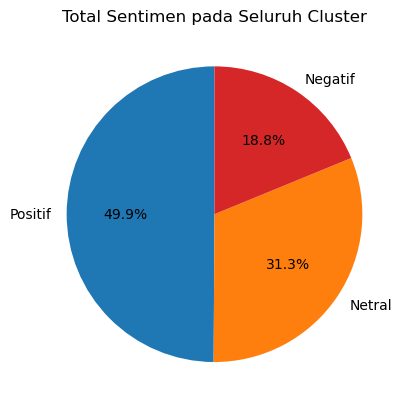

In [70]:
import matplotlib.pyplot as plt

# Prepare data for pie charts
labels = ['Positif', 'Netral', 'Negatif']
sizes = [total_pos_count, total_neu_count, total_neg_count]
colors = ['#1f77b4', '#ff7f0e', '#d62728']

# Make pie charts
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

# Add a title to the pie chart
ax.set_title('Total Sentimen pada Seluruh Cluster')

# Displays a pie chart


plt.show()
